# Research Summary for July 25th, 2023

By: Bora Basyildiz

## Imports

In [14]:
#Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

plt.rcParams["mathtext.fontset"] = 'cm' #Allows matplotlib plots to have latex eqs/symbols

#Plotting function for 
def genPlot(df,l,m="o",msize=5,c="#1f77b4"):
    plt.plot(df["time"],df["fidelity"],marker=m,markersize=msize,color=c)
    plt.xlabel('$T/T_{min}$',fontsize=16)
    plt.ylabel('$F$',fontsize=16)
    plt.grid(which='major', linestyle='-', linewidth='0.5')
    plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
    plt.minorticks_on()
    plt.legend(l)
mainDir = "../Figures/Summary_0725/"
try: #All files are stored under their gateType
    os.makedirs(mainDir)
except:
    pass 
#plt.savefig(os.path.join(os.getcwd(),mainDir,"Ashhab_Hopping.pdf"), format="pdf")

# Large Anharmonicity Optimizations

Here we will redo our optimziations for modeling leakage to the higher energy states using larger anharmonicity values. Here we will take $\delta = 10$  where $\delta$ is our anharmonicity in units of our coupling strength. 

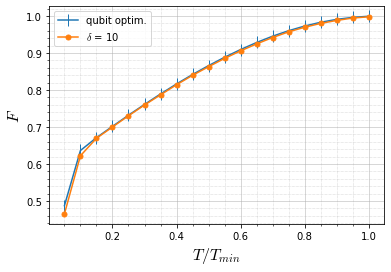

In [6]:
leaky10 = pd.read_csv("../Data/XX/Fidelities/Qubit_CNOT_XX_M16_leakage10_g1.0_maxT1.0_maxD20.csv",names=["fidelity","time"])
leaky10.sort_values(by=["time"],inplace=True)

qubit = pd.read_csv("../Data/XX/Fidelities/Qubit_CNOT_XX_M16_all_g1.0_maxT1.0_maxD20.csv",names=["fidelity","time"])
qubit.sort_values(by=["time"],inplace=True)

genPlot(qubit,["qubit optim."],"|",12)
genPlot(leaky10,["qubit optim.","$\delta$ = 10"])
plt.savefig(os.path.join(os.getcwd(),mainDir,"Leakage10.pdf"), format="pdf")

Here we see that with our high anharmonicity, we are nearly able to recreate our qubit optimzation that only models the computational energy levels. Our fidelities for $T/T_{min}$ are

In [3]:
print("Leakage fidelity at the speed-limit is: " + str(round(leaky10[leaky10["time"] == 1]["fidelity"].values[0],4)))
print("Fidelity at the speed-limit is: " + str(round(qubit[qubit["time"] == 1]["fidelity"].values[0],4)))

Leakage fidelity at the speed-limit is: 0.9978
Fidelity at the speed-limit is: 0.9992


In both cases we see a fidelity $\geq 99\%$. However, we do not reach a fidelity of $\geq 99.99\%$ for our leakage optimzation. Let's see if increasing the anharmonicity further changes this.  

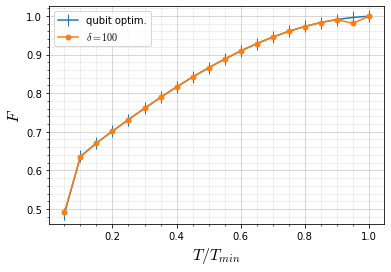

In [7]:
leaky100 = pd.read_csv("../Data/XX/Fidelities/Qubit_CNOT_XX_M16_leakage100_g1.0_maxT1.0_maxD20.csv",names=["fidelity","time"])
leaky100.sort_values(by=["time"],inplace=True)

genPlot(qubit,["qubit optim."],"|",12)
genPlot(leaky100,["qubit optim.","$\delta=100$"])
plt.savefig(os.path.join(os.getcwd(),mainDir,"Leakage100.pdf"), format="pdf")

Outside of the point at $0.9T/T_{min}$, we see near complete saturation of the non-leakge optimization. Now let's check the fidelity at the speed-limit.  

In [5]:
print("Leakage fidelity at the speed-limit is: " + str(round(leaky100[leaky100["time"] == 1]["fidelity"].values[0],4)))

Leakage fidelity at the speed-limit is: 0.9991


If we increase the anharmonicity to 100, we see a fidelity $\geq 99.9\%$. This is on the level of the qubit optimization. Saturating 4 9's would likely need more than the 16 segments used. Note that our non-leakage optimization cannot achieve 4 9's as well.

## Cross Talk Modeling

Here we will model Cross Talk (CT) in our optimization. We will look at modeling CT with and without leakage and for different discretization's of the time dependent pulses. Starting a qubit system, with static CT phases, we have

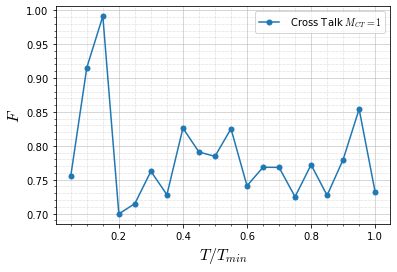

In [17]:
CT1 = pd.read_csv("../Data/XX/Fidelities/Qubit_CNOT_XX_M16_all_g1.0_maxT1.0_maxD20_CT1.csv",names=["fidelity","time"])
CT1.sort_values(by=["time"],inplace=True)

genPlot(CT1,[" Cross Talk $M_{CT} = 1$"])
plt.savefig(os.path.join(os.getcwd(),mainDir,"QubitCT1.pdf"), format="pdf")

This non-smooth semi-chaotic output may be due to an error with the code. This looks at more discretizations and see if we get the same behavior. 

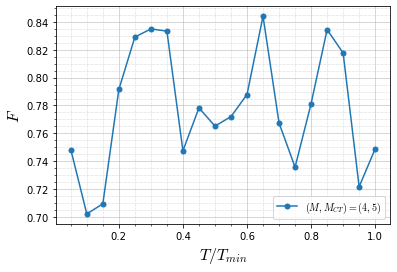

In [4]:
CT5 = pd.read_csv("../Data/XX/Fidelities/Qubit_CNOT_XX_M4_all_g1.0_maxT1.0_maxD20_CT5.csv",names=["fidelity","time"])
CT5.sort_values(by=["time"],inplace=True)

genPlot(CT5,["$(M,M_{CT}) = (4,5)$"])
plt.savefig(os.path.join(os.getcwd(),mainDir,"QubitCT5.pdf"), format="pdf")

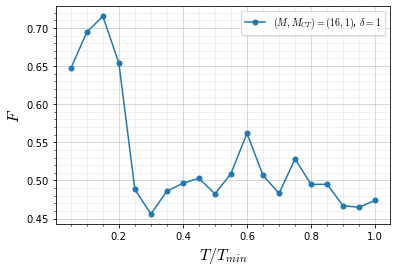

In [17]:
CTL1 = pd.read_csv("../Data/XX/Fidelities/Qubit_CNOT_XX_M16_leakage1_g1.0_maxT1.0_maxD20_CT1.csv",names=["fidelity","time"])
CTL1.sort_values(by=["time"],inplace=True)

genPlot(CTL1,["$(M,M_{CT}) = (16,1)$, $\delta = 1$"])
plt.savefig(os.path.join(os.getcwd(),mainDir,"CTLeak1.pdf"), format="pdf")

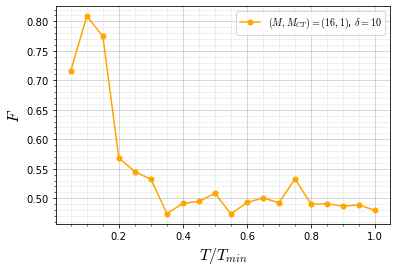

In [18]:
CTL10 = pd.read_csv("../Data/XX/Fidelities/Qubit_CNOT_XX_M16_leakage10_g1.0_maxT1.0_maxD20_CT1.csv",names=["fidelity","time"])
CTL10.sort_values(by=["time"],inplace=True)

genPlot(CTL10,["$(M,M_{CT}) = (16,1)$, $\delta = 10$"],c="orange")
plt.savefig(os.path.join(os.getcwd(),mainDir,"CTLeak10.pdf"), format="pdf")